In [1]:
import dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering,DBSCAN,KMeans

X, Y = dataset.load_data()
images = X
types = Y[0]

In [2]:
type_labels = np.array([
    "Normal",
    "Fire",
    "Water",
    "Electric",
    "Grass",
    "Ice",
    "Fighting",
    "Poison",
    "Ground",
    "Flying",
    "Psychic",
    "Bug",
    "Rock",
    "Ghost",
    "Dragon",
    "Dark",
    "Steel",
    "Fairy"])

In [4]:
images = images.astype(np.float32) / 255.
images = images.reshape(len(images),-1).astype(np.float32)
pca = PCA(whiten=True, random_state=0)
X_pca = pca.fit_transform(images)

In [34]:
# Kmeans法でクラスタリング
km = KMeans(n_clusters=18, random_state=0)
labels_km = km.fit_predict(X_pca)
print("Cluster size k-means:{}".format(np.bincount(labels_km)))

Cluster size k-means:[47 35 51 59 60 52 56 24  9 49 45 30 63 40 28 51 68 34]


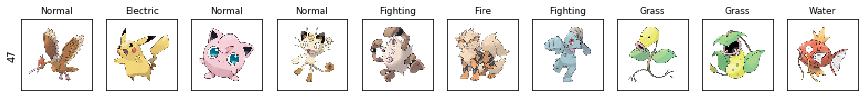

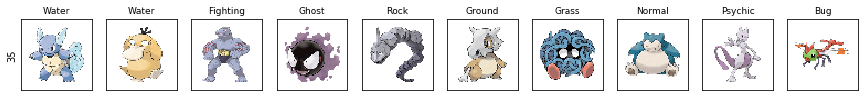

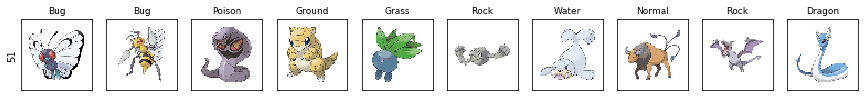

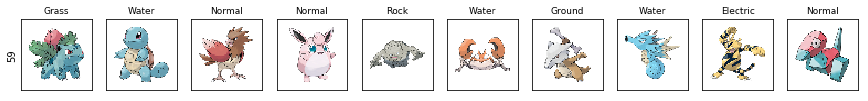

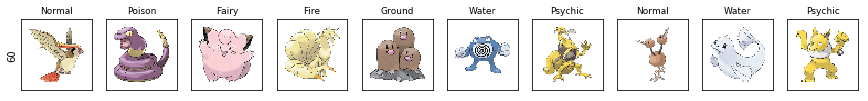

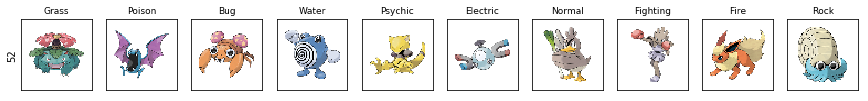

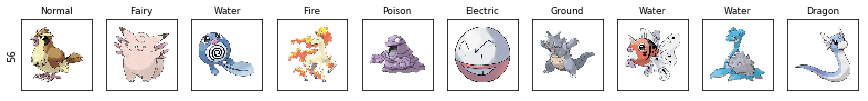

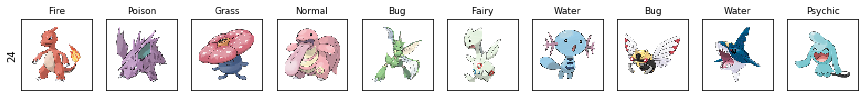

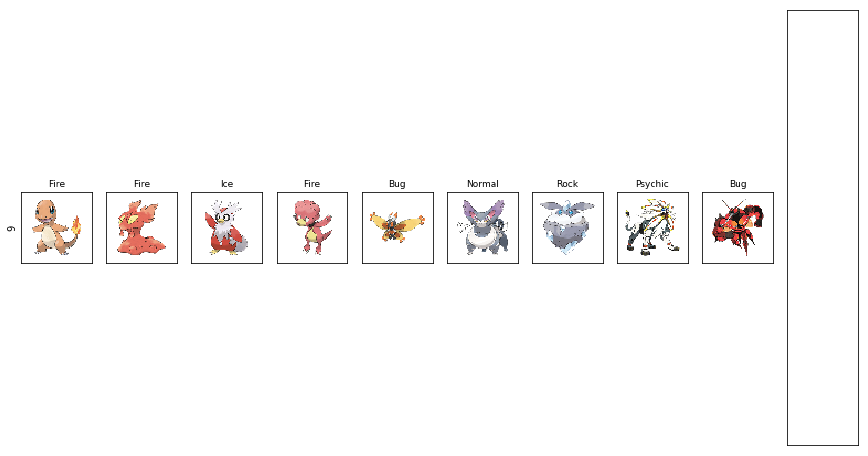

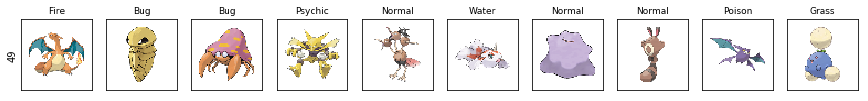

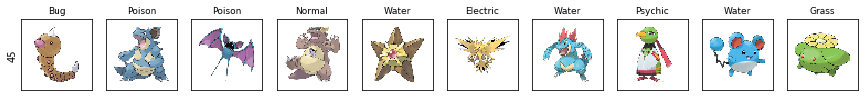

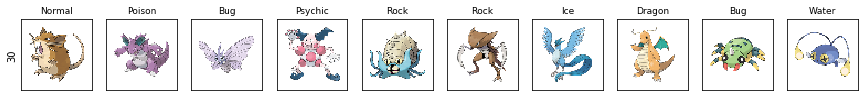

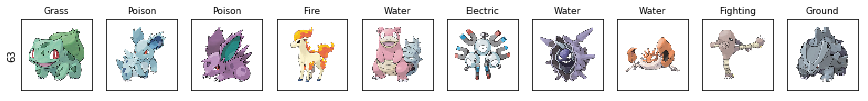

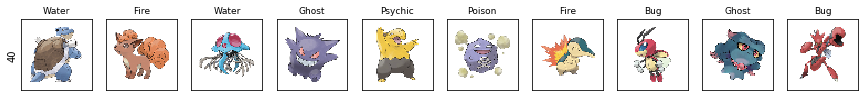

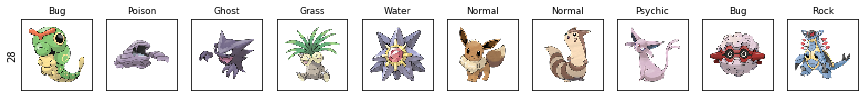

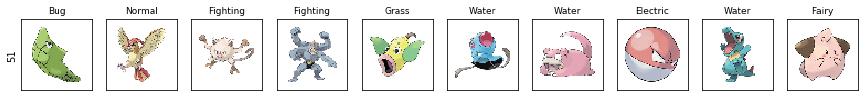

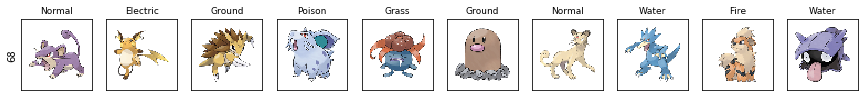

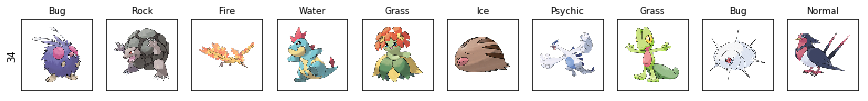

In [52]:
# 可視化
n_clusters = 18
for cluster in range(n_clusters):
    mask = km.labels_ == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks':(), 'yticks':()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(images[mask], types[mask], km.labels_[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(type_labels[label].split()[-1], fontdict={'fontsize':9})

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Text(0, -40, 'Far from center')

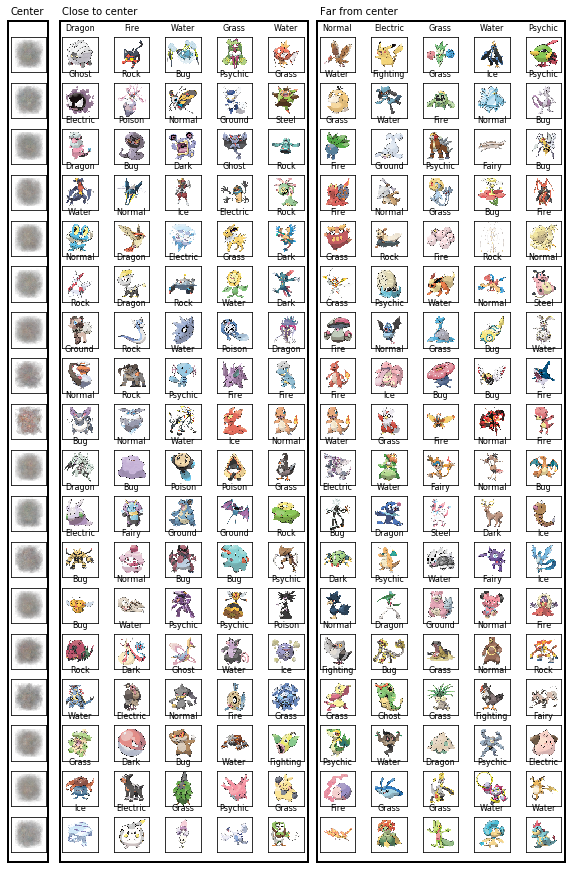

In [48]:
import matplotlib.pyplot as plt 
n_clusters = 18
image_shape = (64, 64, 4)
fig, axes = plt.subplots(n_clusters, 11, subplot_kw={'xticks': (), 'yticks': ()},
                             figsize=(10, 15), gridspec_kw={"hspace": .3})

for cluster in range(n_clusters):
    center = km.cluster_centers_[cluster]
    mask = km.labels_ == cluster
    dists = np.sum((X_pca - center) ** 2, axis=1)
    dists[~mask] = np.inf
    inds = np.argsort(dists)[:5]
    dists[~mask] = -np.inf
    inds = np.r_[inds, np.argsort(dists)[-5:]]
    axes[cluster, 0].imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)
    for image, label, asdf, ax in zip(images[inds], types[inds],
                                          km.labels_[inds], axes[cluster, 1:]):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title("%s" % (type_labels[label].split()[-1]), fontdict={'fontsize': 8})

# add some boxes to illustrate which are similar and which dissimilar
rec = plt.Rectangle([-5, -30], 73, 1525, fill=False, lw=2)
rec = axes[0, 0].add_patch(rec)
rec.set_clip_on(False)
axes[0, 0].text(0, -40, "Center")

rec = plt.Rectangle([-5, -30], 450, 1525, fill=False, lw=2)
rec = axes[0, 1].add_patch(rec)
rec.set_clip_on(False)
axes[0, 1].text(0, -40, "Close to center")

rec = plt.Rectangle([-5, -30], 450, 1525, fill=False, lw=2)
rec = axes[0, 6].add_patch(rec)
rec.set_clip_on(False)
axes[0, 6].text(0, -40, "Far from center")

In [30]:
agglomerative = AgglomerativeClustering(n_clusters=18)
labels_agg = agglomerative.fit_predict(X_pca)
print("Cluster size:{}".format(np.bincount(labels_agg)))

Cluster size:[214  33   9  21  37 104  71  49  48   1  57  32  77   1   5   4  37   1]


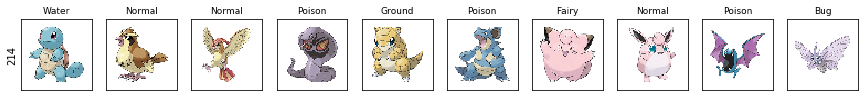

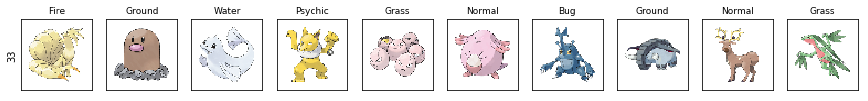

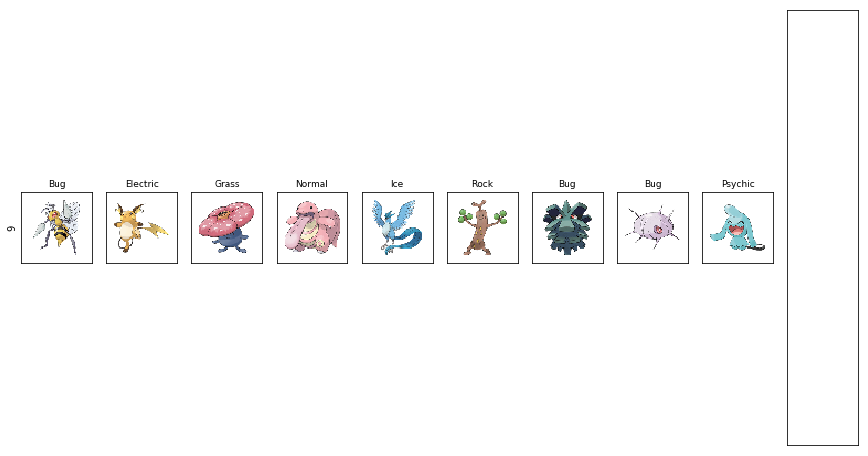

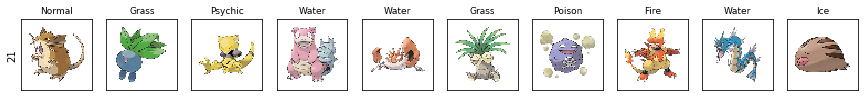

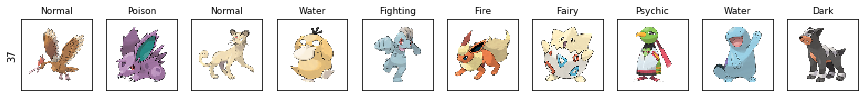

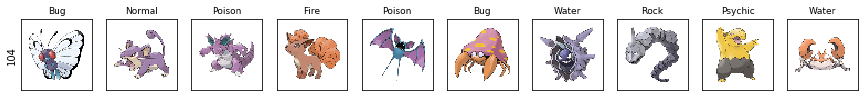

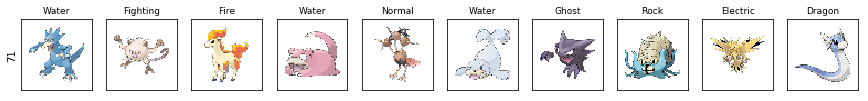

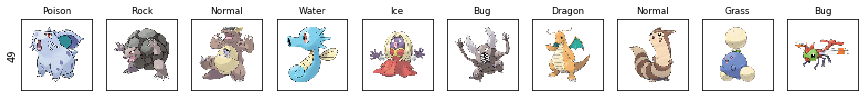

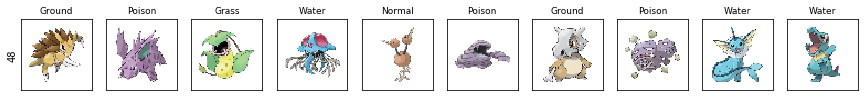

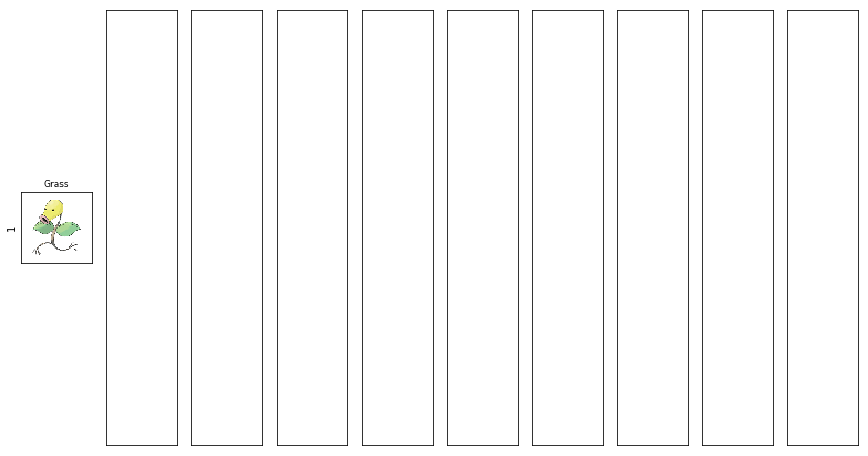

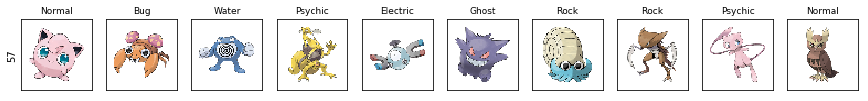

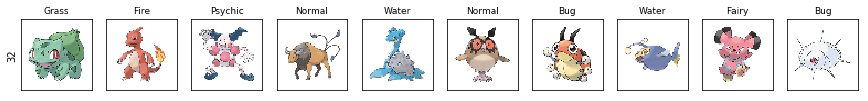

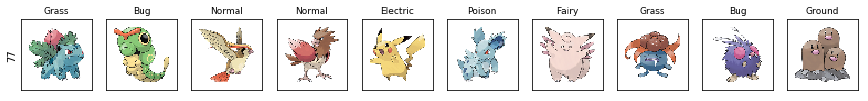

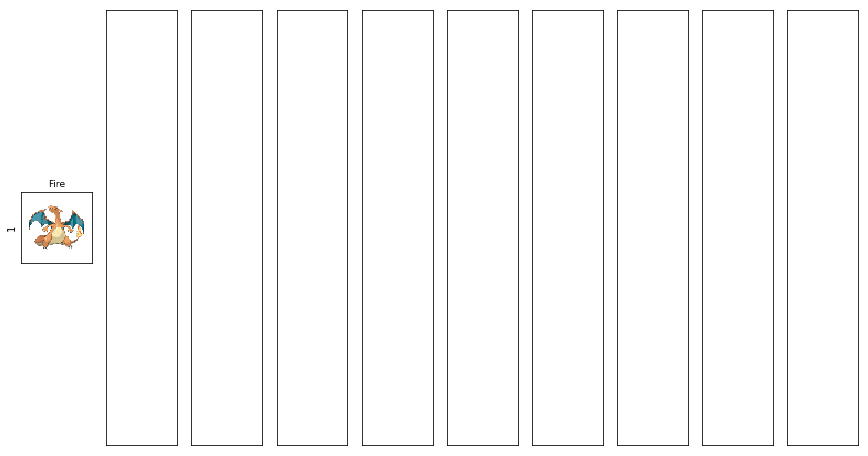

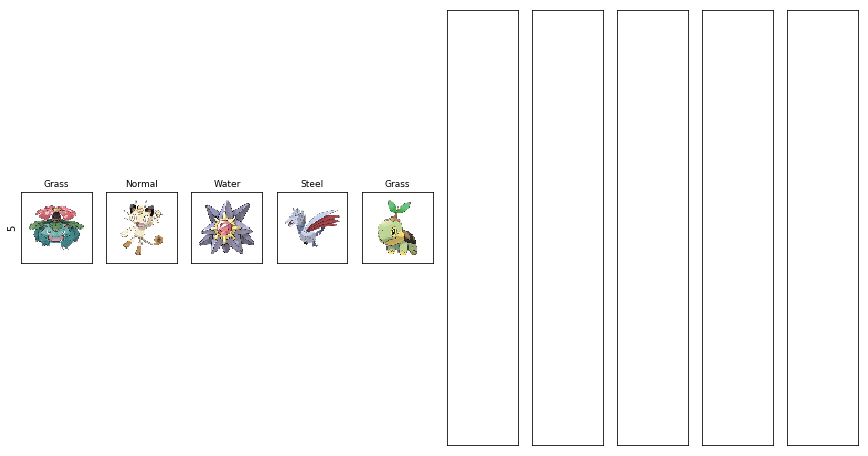

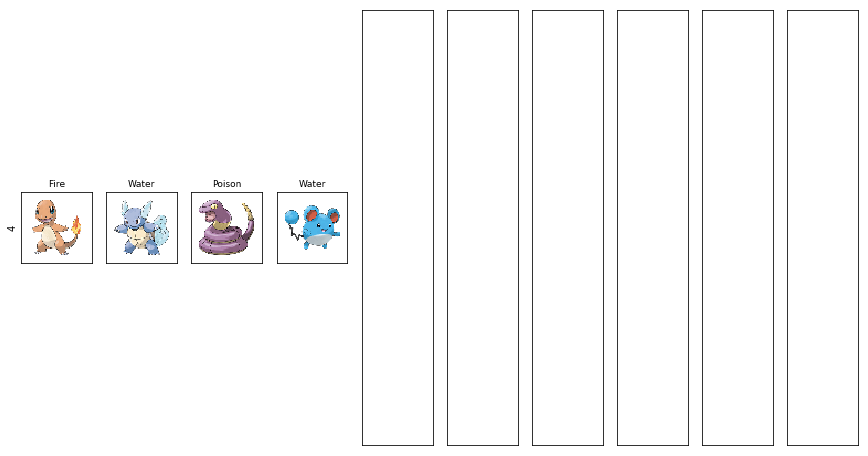

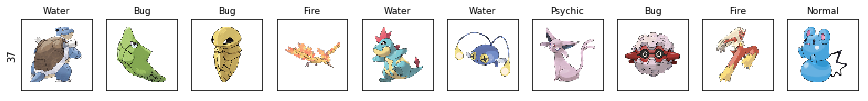

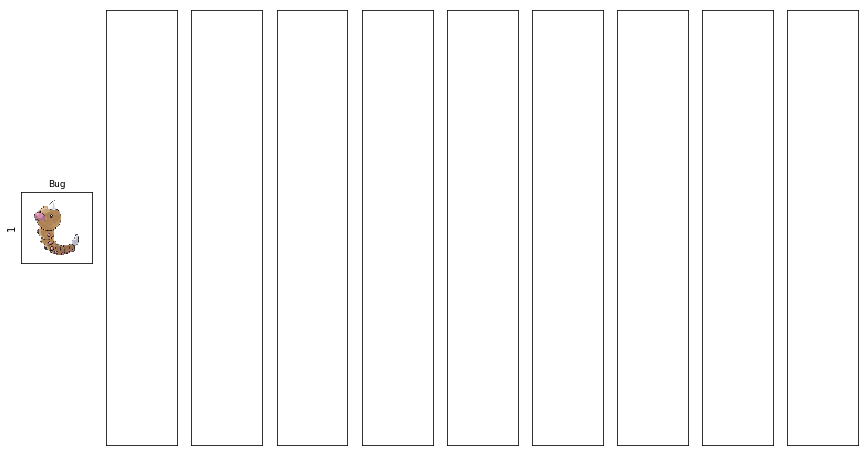

In [40]:
n_clusters = 18
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks':(), 'yticks':()}, figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(images[mask], types[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(type_labels[label].split()[-1], fontdict={'fontsize':9})


In [59]:
import cv2

In [35]:
model = KMeans(n_clusters=18)

In [37]:
model.fit(images)
# model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=18, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [38]:
model.cluster_centers_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [40]:
centers = np.zeros(model.cluster_centers_.shape, dtype=np.uint8)
for i in range(0, model.cluster_centers_.shape[0]):
    val = model.cluster_centers_[i]
    for j in range(0, model.cluster_centers_.shape[1]):
        centers[i][j] = int(val[j])

In [41]:
img_cnv = np.empty((0,4), dtype=np.uint8)
for i in range(0, Y.shape[0]):
    rgb = centers[Y[i]]
    img_cnv = np.append(img_cnv, np.array([rgb]))

In [42]:
# img_cnv = img_cnv.reshape(64, 64, 4)
# plt.imshow(img_cnv)

In [5]:
# images2=images[:200]
# types2=types[:200]
image_shape=(64, 64, 4)
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
result = linkage(images, method='ward', metric='euclidean')

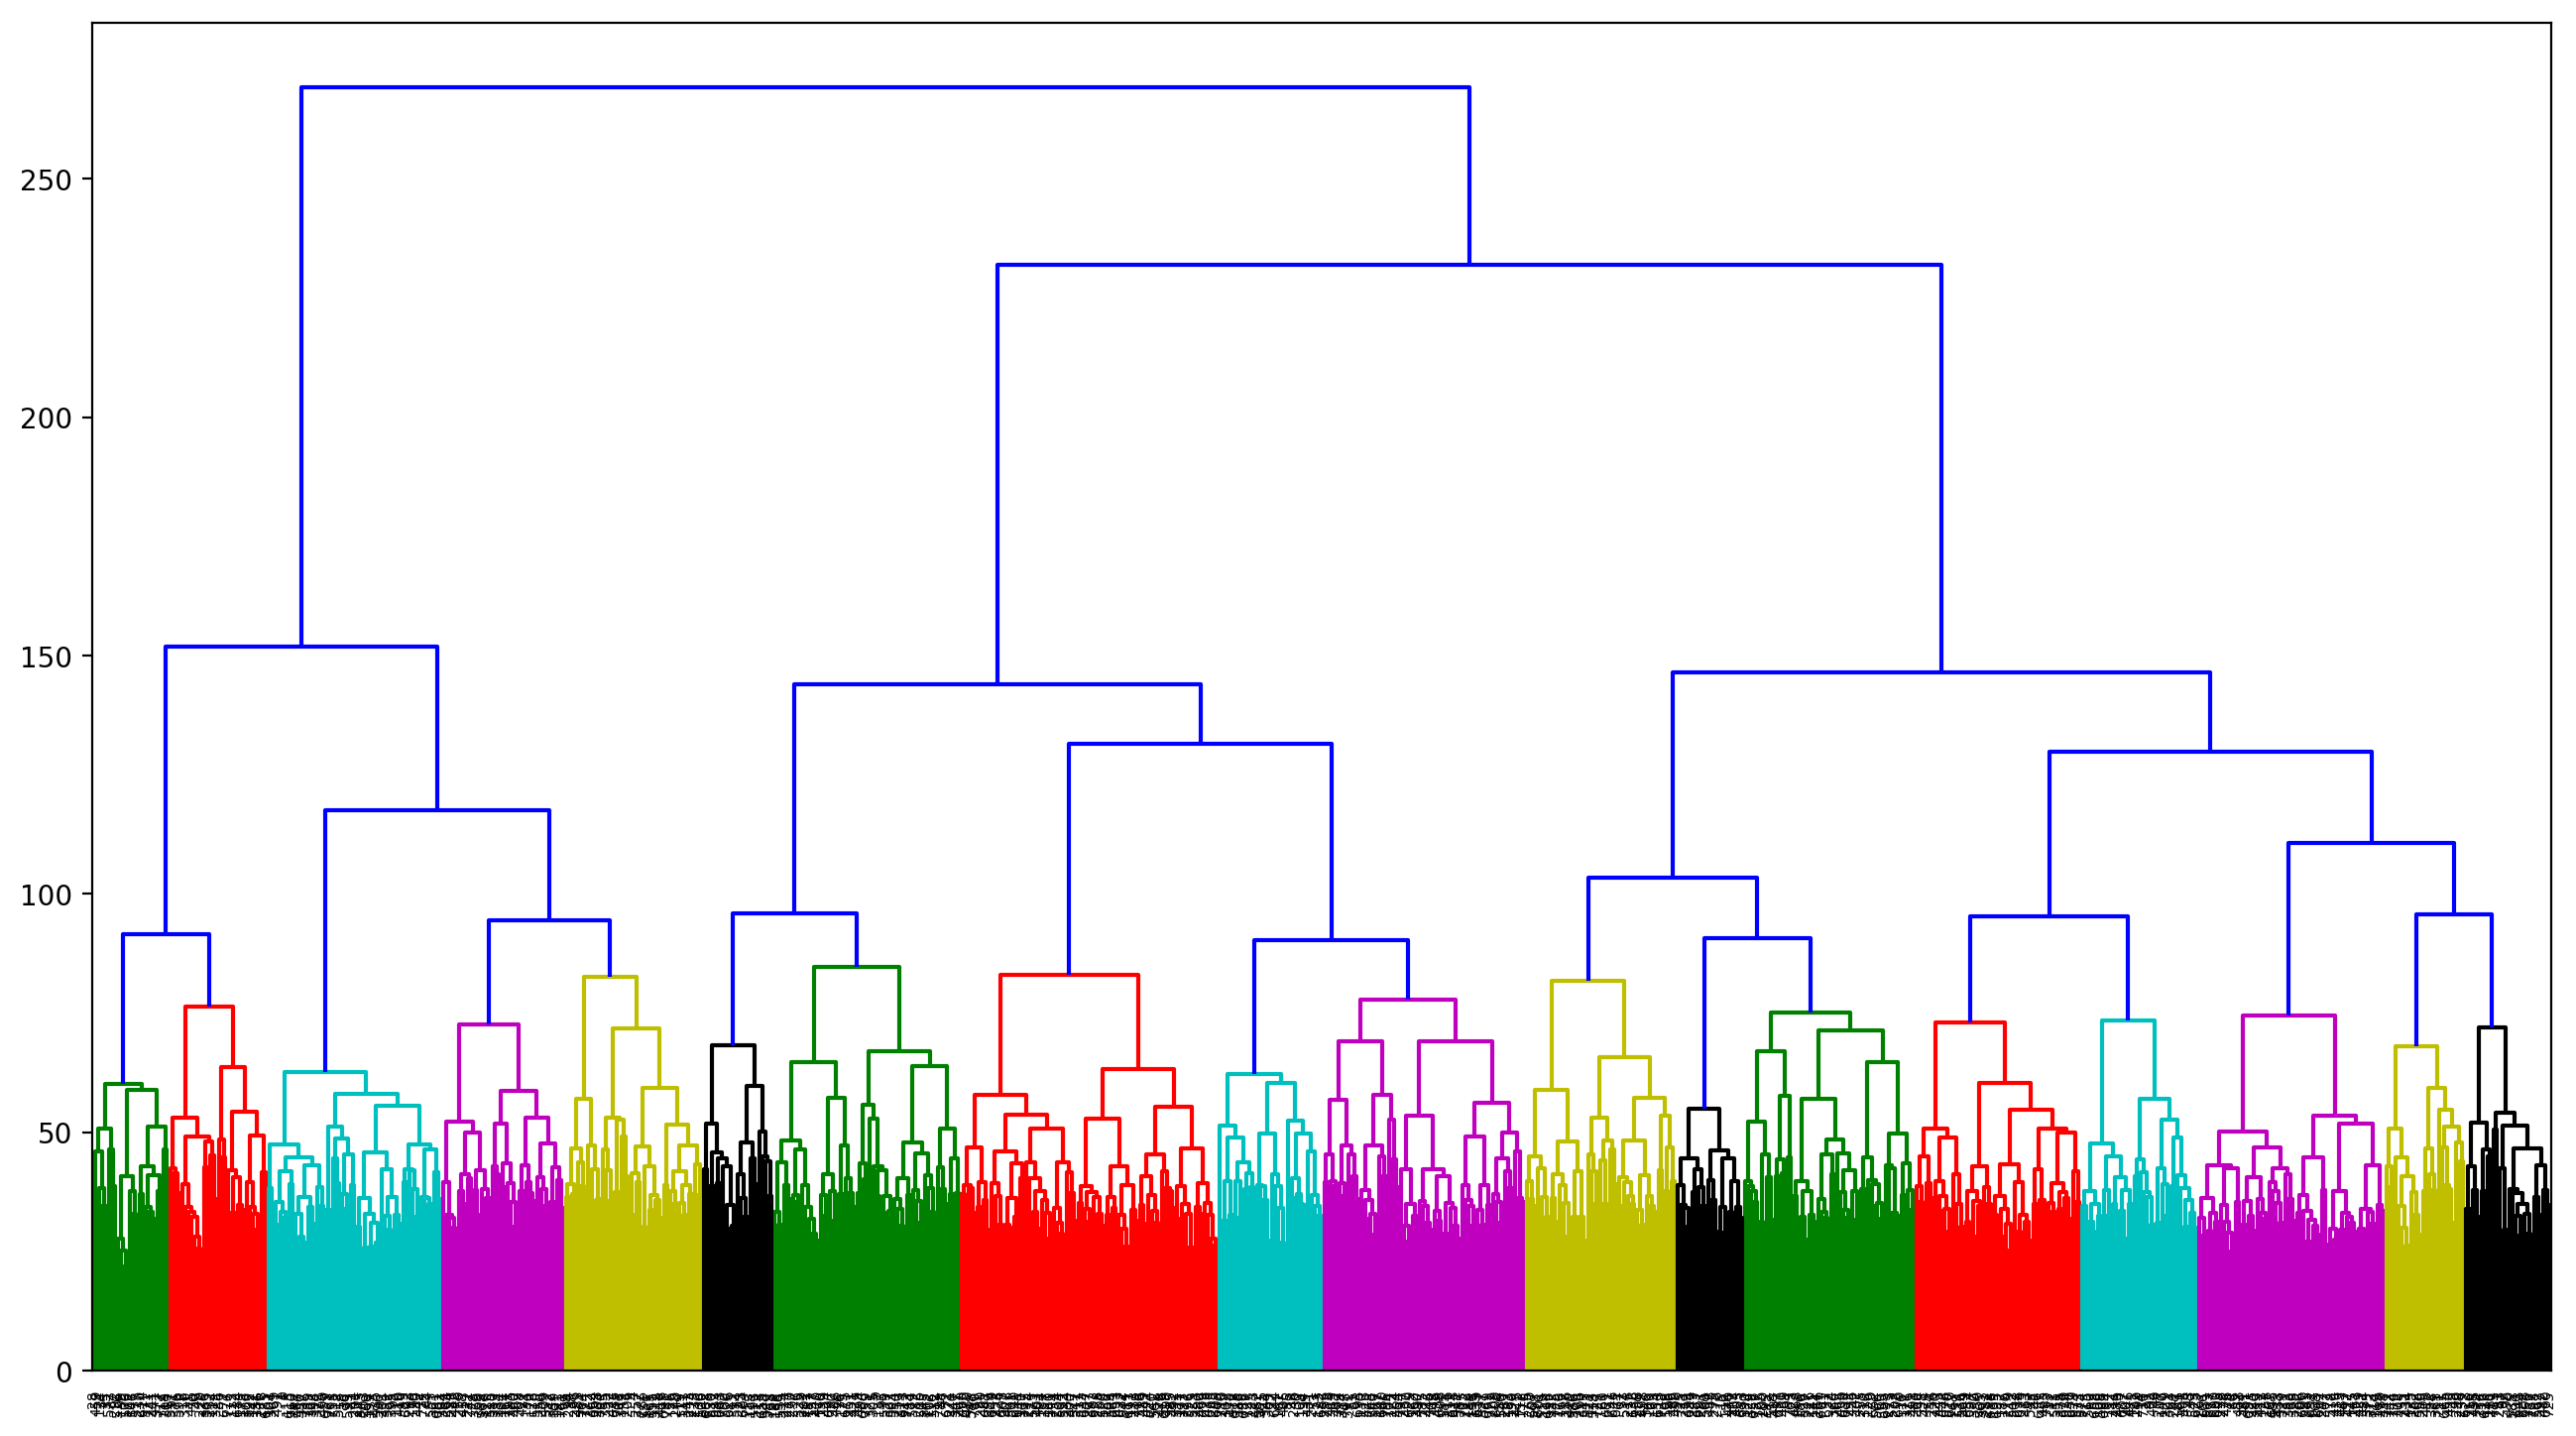

In [6]:
threshold = 0.333 * np.max(result[:, 2])
# 階層型クラスタリングの可視化
plt.figure(num=None, figsize=(16, 9), dpi=200, facecolor='w', edgecolor='k')
dendrogram(result, color_threshold=threshold)
plt.show()

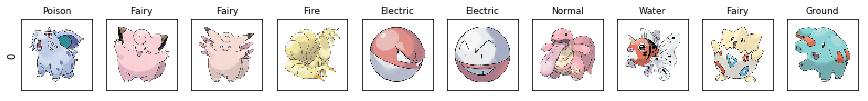

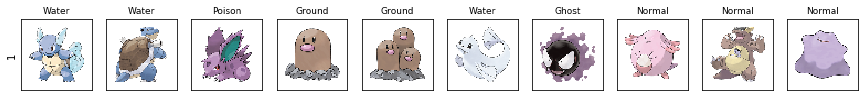

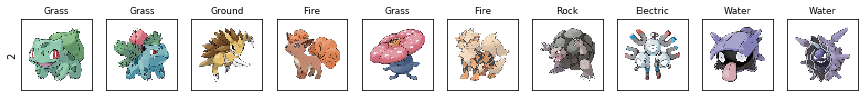

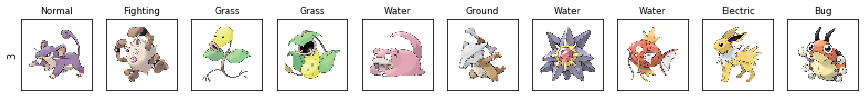

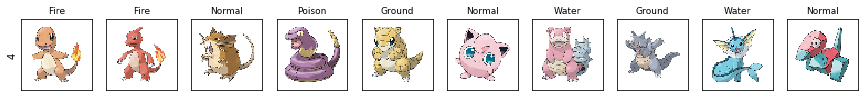

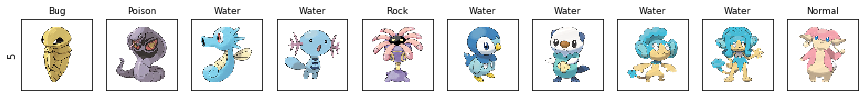

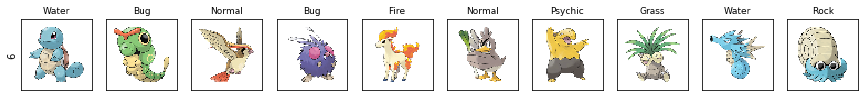

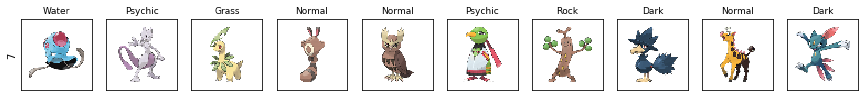

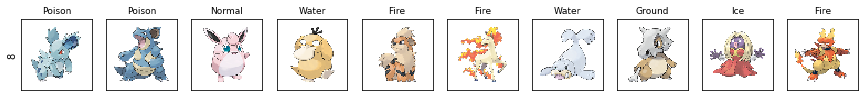

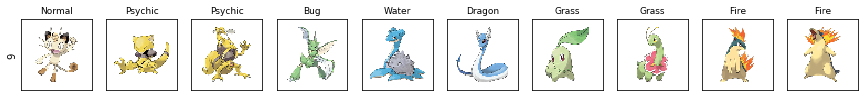

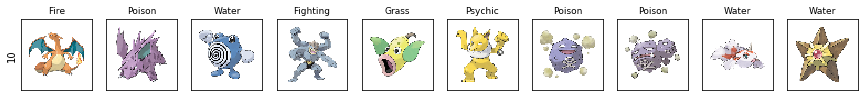

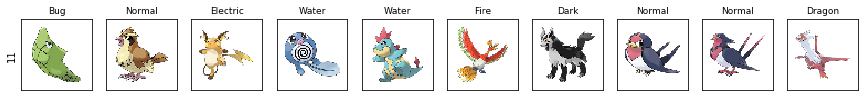

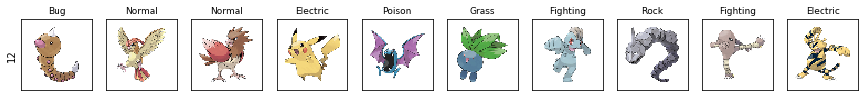

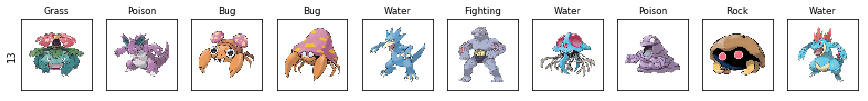

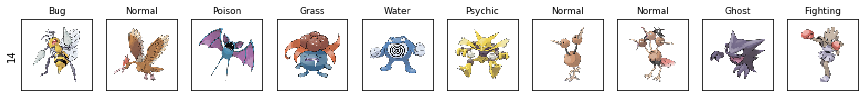

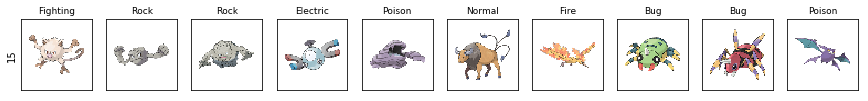

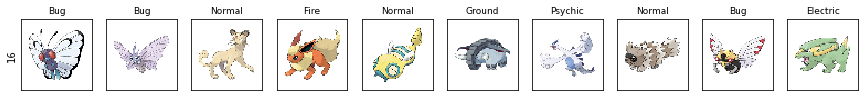

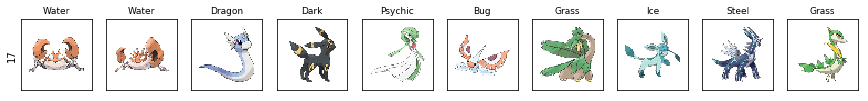

In [8]:
# クラスタリング結果の値を取得
clustered = fcluster(result, threshold, criterion='distance')

# # クラスタリング結果を比較
# print(clustered)

for cluster in range(max(clustered)):
    mask = clustered == cluster+1
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks':(), 'yticks':()}, figsize=(15, 8))
    axes[0].set_ylabel(cluster)
    for image, label, asdf, ax in zip(images[mask], types[mask], clustered[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(type_labels[label].split()[-1], fontdict={'fontsize':9})